In [1]:
#import relevant libraries: pip install re, pip install natsort, pip install plotly==5.10.0
import sys
import os
import glob

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import datetime as dt8
import math
import matplotlib.pyplot as plt
import decimal
import re
from natsort import index_natsorted
import dabest
import dabest_jck

import NLCLIMB 
import NLMATH

import plotly.express as px 
from plotly.subplots import make_subplots
import plotly.graph_objects as go

#NOTE: SUPPRESSES WARNINGS!

import warnings

warnings.simplefilter(action="ignore", category=RuntimeWarning)
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

In [30]:
#Initial file processing
computer1 = "C:\\Users\\User"
computer2 = "C:\\Users\\lnico"
homecomp = "D:"
filedir = "\\ACC Lab Dropbox\\ACC Lab\\Nicole Lee\\Data Compilation\\Falling_New\\"
openPath = homecomp + filedir
files = os.listdir(openPath)

#identifying genotypes
responder = "Tub_Tsh_Chrimson2"
driver = "SS81521"
wt = "w1118"
transgenic = driver + " x " + responder
filename = openPath + transgenic + ".csv"
filenamewt = openPath + wt+"_"+ transgenic + ".csv"

print(filename)
print(filenamewt)

D:\ACC Lab Dropbox\ACC Lab\Nicole Lee\Data Compilation\Falling_New\SS81521 x Tub_Tsh_Chrimson2.csv
D:\ACC Lab Dropbox\ACC Lab\Nicole Lee\Data Compilation\Falling_New\w1118_SS81521 x Tub_Tsh_Chrimson2.csv


In [31]:
dfe=pd.read_csv(filename)
dfw= pd.read_csv(filenamewt)

exptdf = dfe.drop(dfe.columns[[0]],axis = 1)
wtdf = dfw.drop(dfw.columns[[0]],axis = 1)

dfexpt = NLCLIMB.generation(exptdf, driver)
dfwt = NLCLIMB.generation(wtdf, wt)

dfe_F = NLMATH.falldbest(dfexpt, "Expt")
dfw_F = NLMATH.falldbest(dfwt, "WT")

awt5 = pd.concat([dfe_F, dfw_F], axis = 0).reset_index(drop = True)
awt5['genre'] = awt5['ExperimentState'] + " " + awt5['Type']
awt5['value'] = 0
awt5.loc[(awt5['Falls'] >0), ['value']] = 1

# prop plot

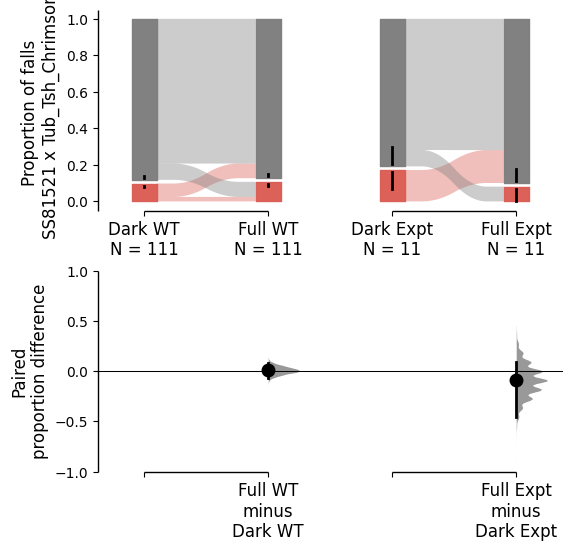

In [32]:
paired_prop2 = dabest_jck.load(data = awt5,idx=(("Dark WT", "Full WT"),("Dark Expt", "Full Expt")),
                              paired = "baseline", id_col="index",proportional=True,
                              x = "genre", y = "value")

paired_prop2.mean_diff.plot(bar_label = "Proportion of falls \n" + transgenic,contrast_ylim=(-1, 1));

DABEST v2023.03.29
                  
Good morning!
The current time is Mon Aug  5 02:21:17 2024.

The paired mean difference for repeated measures against baseline 
between Dark WT and Full WT is 0.0631 [95%CI 0.00971, 0.112].
The p-value of the two-sided permutation t-test is 0.011, calculated for legacy purposes only. 

The paired mean difference for repeated measures against baseline 
between Dark WT and Recovery WT is -0.0583 [95%CI -0.107, -0.0243].
The p-value of the two-sided permutation t-test is 0.0024, calculated for legacy purposes only. 

The paired mean difference for repeated measures against baseline 
between Dark Expt and Full Expt is 0.0 [95%CI -0.123, 0.108].
The p-value of the two-sided permutation t-test is 0.791, calculated for legacy purposes only. 

The paired mean difference for repeated measures against baseline 
between Dark Expt and Recovery Expt is -0.0923 [95%CI -0.215, -0.0154].
The p-value of the two-sided permutation t-test is 0.0434, calculated for leg

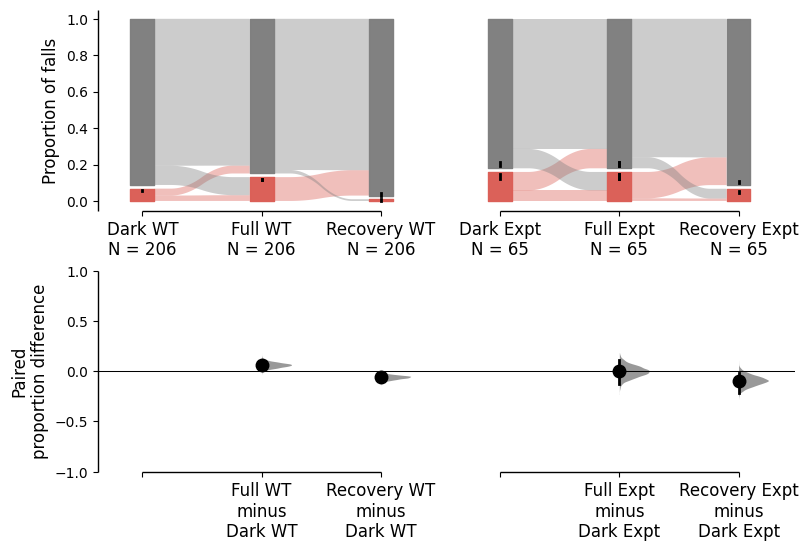

In [5]:
paired_prop1 = dabest_jck.load(data = awt5,idx=(("Dark WT", "Full WT", "Recovery WT"),("Dark Expt", "Full Expt", "Recovery Expt")),
                              paired = "baseline", id_col="index",proportional=True,
                              x = "genre", y = "value")

paired_prop1.mean_diff.plot(bar_label = "Proportion of falls",contrast_ylim=(-1, 1));
paired_prop1.mean_diff

c:\Users\user\anaconda3\lib\site-packages\dabest_sk\plotter.py:496: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar2 = sns.barplot(data=plot_data, x=xvar, y=yvar,


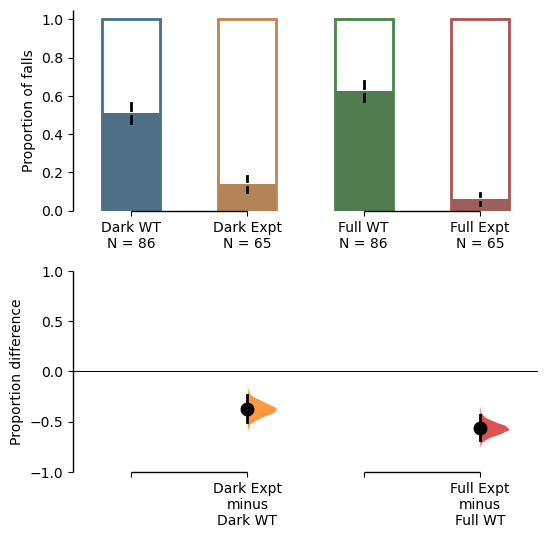

In [14]:
paired_prop3 = dabest_sk.load(data = awt5,idx=(("Dark WT", "Dark Expt"),("Full WT", "Full Expt")),
                              id_col="index",proportional=True,
                              x = "genre", y = "value")

paired_prop3.mean_diff.plot(bar_label = "Proportion of falls",contrast_ylim=(-1, 1));

# delta delta plots

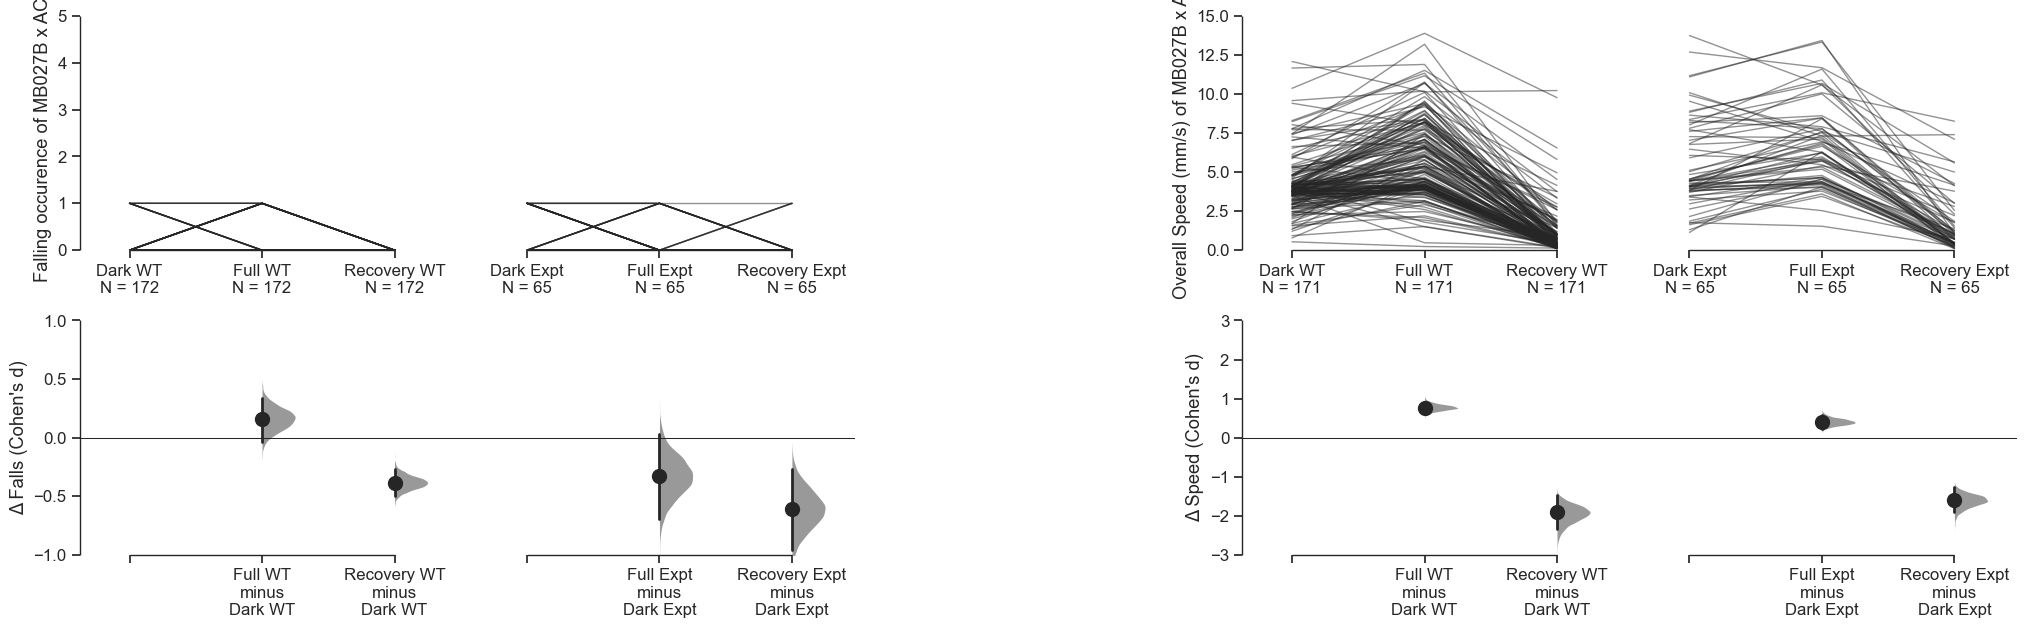

In [29]:
import seaborn as sns
f, axx = plt.subplots(nrows=1, ncols=2,
                    figsize=(25
                             ,7),
                    gridspec_kw={'wspace': 0.5} # ensure proper width-wise spacing.
                   )

#FALLING OCCURENCE

deltaplots = dabest.load(data=awt5, idx=(("Dark WT", "Full WT", "Recovery WT"),("Dark Expt", "Full Expt", "Recovery Expt")),
                              paired = "baseline", id_col="index", proportional = False,
                              x = "genre", y = "value")

deltaplots.cohens_d.plot(swarm_label="Falling occurence of " + transgenic,
                                     contrast_label="Δ Falls (Cohen's d)", raw_marker_size=2, es_marker_size=10, swarm_ylim=(0,5), contrast_ylim=(-1, 1), ax=axx.flat[0]);

#speed
df_se = NLMATH.velodabest(dfexpt, "Expt", "Velocity")
df_sw = NLMATH.velodabest(dfwt, "WT", "Velocity")

fgt6_db=pd.DataFrame()
fgt6_db = pd.concat([df_se, df_sw]).reset_index(drop=False)
fgt6_db['genre'] = fgt6_db['ExperimentState'] + " " + fgt6_db['Type']

#overallspeed
overallspeed = dabest.load(data=fgt6_db, idx=(("Dark WT", "Full WT", "Recovery WT"),("Dark Expt", "Full Expt", "Recovery Expt")),
                              paired = "baseline", id_col="index", proportional = False,
                              x = "genre", y = "Velocity")


overallspeed.cohens_d.plot(swarm_label="Overall Speed (mm/s) of " + transgenic ,
                                     contrast_label="Δ Speed (Cohen's d)",  es_marker_size=10, swarm_ylim=(0,15), contrast_ylim=(-3, 3), ax=axx.flat[1]);       

sns.set(font_scale=1.1)

In [30]:
f.savefig(openPath + 'images\\twodabestplotsmin_' +  transgenic + ".svg")